In [1]:
from optimization import optimize
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from oracle import Oracle, make_oracle
from typing import List
from sklearn.linear_model import LogisticRegression
from tabulate import tabulate

import seaborn as sns
sns.set()


In [2]:
def optimize_sklearn(oracle):
    model = LogisticRegression(penalty="None", tol=1e-8, max_iter=10000, n_jobs=-1, fit_intercept=False)
    model.fit(oracle.X, oracle.Y.ravel())

    entropy_true = oracle.value(model.coef_.reshape(-1, 1))
    return entropy_true

In [3]:
def plot(data, data_types, xaxis: str, title: str = None):
    fig = plt.figure(figsize=(9,8))

    for lambda_ in data_types:
        data_to_plot = data[data["lambda"] == lambda_]
        plt.plot(data_to_plot[xaxis], data_to_plot.rk, label=f"{lambda_}")

    plt.suptitle(title, y=1.02)
    plt.ylabel("$\log r_k$")

    if xaxis == "num_iter":
        xlabel = "Iteration number"
    elif xaxis == "oracle_calls":
        xlabel = "Oracle calls"
    else:
        xlabel = "Time, s"

    plt.xlabel(xlabel)
    plt.yscale("log")
    fig.legend(loc="upper center", ncol=6, bbox_to_anchor=(0.5, 0.97))
    plt.show()

In [4]:
def print_table(data):
    table = [data.columns.values.tolist()] + data.values.tolist()
    print(tabulate(table,
                   headers="firstrow",
                   tablefmt="github",
                   ))

In [5]:
from tqdm.notebook import tqdm
max_iter = 10000
oracle = make_oracle("a1a.libsvm")
w0 = np.zeros((oracle.m, 1))

to_df = []
best_to_df = []

for lambda_ in tqdm(np.logspace(-8, 0, 50)):
    w, log = optimize(w0, oracle, max_iter=max_iter,lambda_=lambda_)

    to_df.append(log.dataframe)
    best_to_df.append(log.best)

best_data = pd.concat(best_to_df, ignore_index=True)
data = pd.concat(to_df, ignore_index=True)

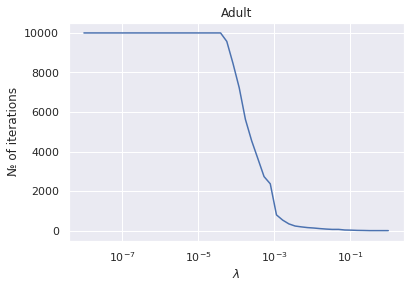

In [6]:
plt.plot(best_data["lambda"], best_data["num_iter"])
plt.xscale("log")
plt.xlabel("$\\lambda$")
plt.ylabel("№ of iterations")
plt.title("Adult")
plt.show()

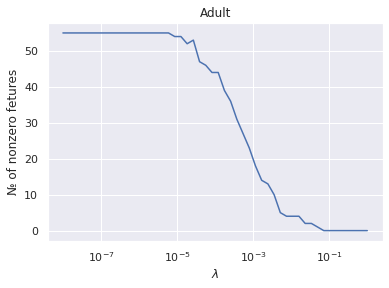

In [7]:
plt.plot(best_data["lambda"], best_data["nonzero"])
plt.xscale("log")
plt.xlabel("$\\lambda$")
plt.ylabel("№ of nonzero fetures")
plt.title("Adult")
plt.show()

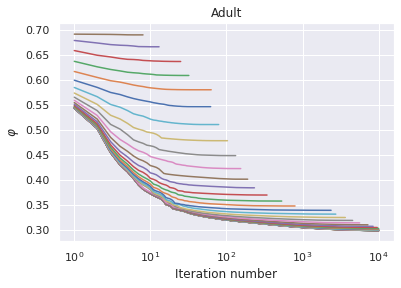

In [8]:
for lambda_ in np.unique(data["lambda"]):
    data_to_plot = data[data["lambda"] == lambda_]
    plt.plot(data_to_plot["num_iter"], data_to_plot["entropy"], label=f"{lambda_}")

plt.xscale("log")
plt.xlabel("Iteration number")
plt.ylabel("$\\varphi$")
plt.title("Adult")
plt.show()

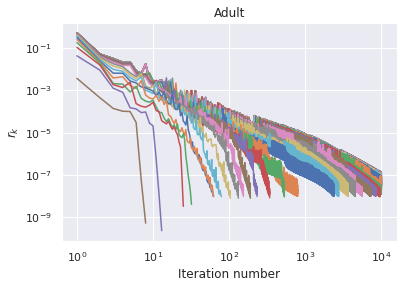

In [9]:
for lambda_ in np.unique(data["lambda"]):
    data_to_plot = data[data["lambda"] == lambda_]
    plt.plot(data_to_plot["num_iter"], data_to_plot["rk"])

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Iteration number")
plt.ylabel("$r_k$")
plt.title("Adult")
plt.show()

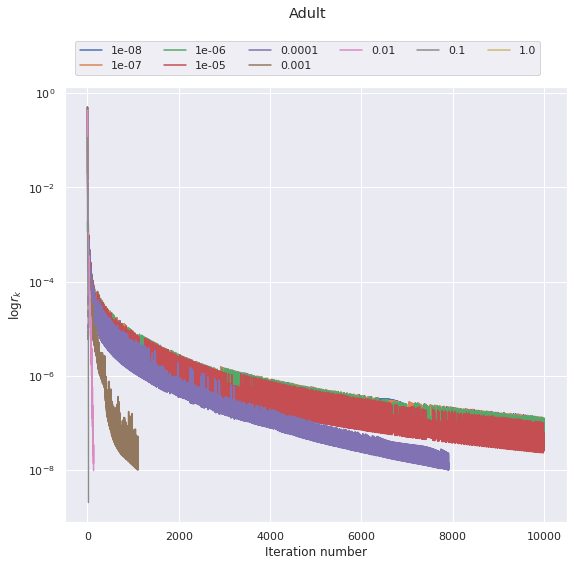

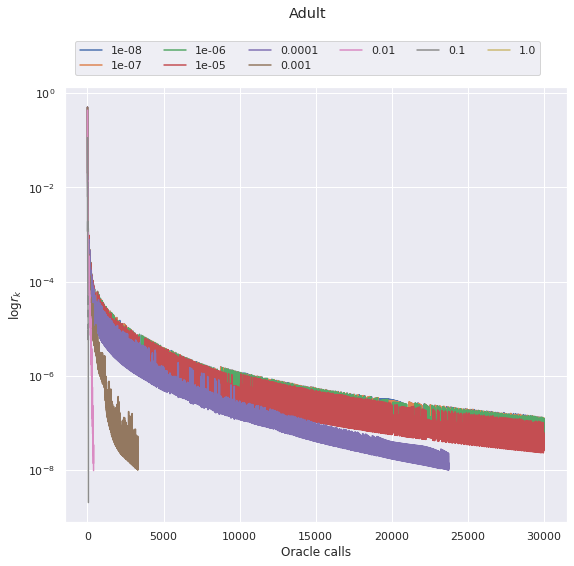

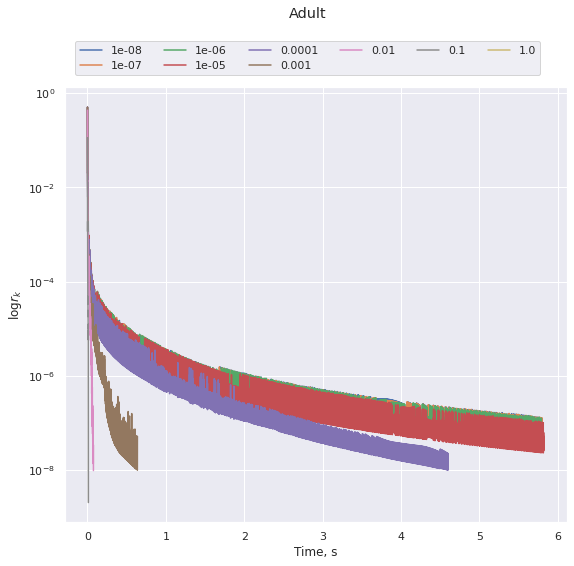

In [10]:
max_iter = 10000
oracle = make_oracle("a1a.libsvm")
w0 = np.zeros((oracle.m, 1))

to_df = []
best_to_df = []
logs = []

lambdas = np.logspace(-8, 0, 9)

for lambda_ in lambdas:
    w, log = optimize(w0, oracle, max_iter=max_iter, lambda_=lambda_)

    logs.append(log)
    to_df.append(log.dataframe)
    best_to_df.append(log.best)

best_data = pd.concat(best_to_df, ignore_index=True)
data = pd.concat(to_df, ignore_index=True)

plot(data, lambdas, "num_iter", "Adult")
plot(data, lambdas, "oracle_calls", "Adult")
plot(data, lambdas, "time", "Adult")

In [11]:
from tqdm.notebook import tqdm
max_iter = 10000
oracle = make_oracle("breast-cancer_scale.libsvm")
w0 = np.zeros((oracle.m, 1))

to_df = []
best_to_df = []
logs = []

for lambda_ in tqdm(np.logspace(-8, 0, 50)):
    w, log = optimize(w0, oracle, max_iter=max_iter,lambda_=lambda_)

    logs.append(log)
    to_df.append(log.dataframe)
    best_to_df.append(log.best)

best_data = pd.concat(best_to_df, ignore_index=True)
data = pd.concat(to_df, ignore_index=True)

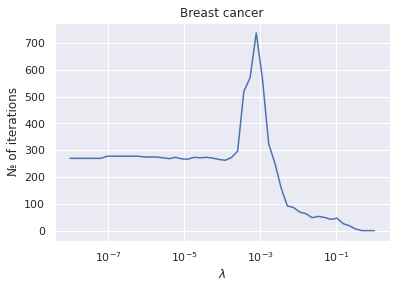

In [12]:
plt.plot(best_data["lambda"], best_data["num_iter"])
plt.xscale("log")
plt.xlabel("$\\lambda$")
plt.ylabel("№ of iterations")
plt.title("Breast cancer")
plt.show()

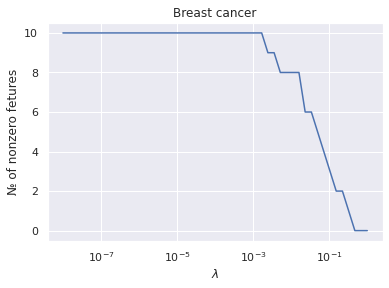

In [13]:
plt.plot(best_data["lambda"], best_data["nonzero"])
plt.xscale("log")
plt.xlabel("$\\lambda$")
plt.ylabel("№ of nonzero fetures")
plt.title("Breast cancer")
plt.show()

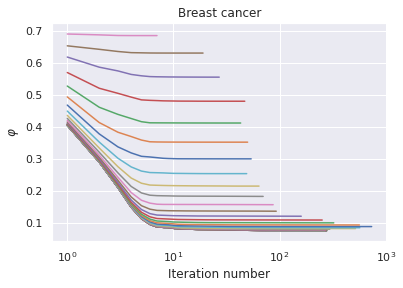

In [14]:
for lambda_ in np.unique(data["lambda"]):
    data_to_plot = data[data["lambda"] == lambda_]
    plt.plot(data_to_plot["num_iter"], data_to_plot["entropy"])

plt.xscale("log")
plt.xlabel("Iteration number")
plt.ylabel("$\\varphi$")
plt.title("Breast cancer")
plt.show()

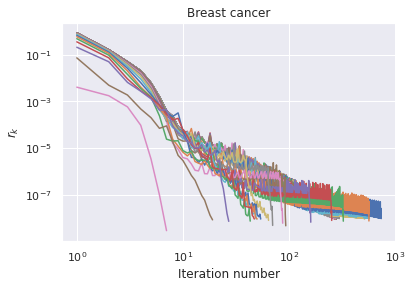

In [15]:
for lambda_ in np.unique(data["lambda"]):
    data_to_plot = data[data["lambda"] == lambda_]
    plt.plot(data_to_plot["num_iter"], data_to_plot["rk"])

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Iteration number")
plt.ylabel("$r_k$")
plt.title("Breast cancer")
plt.show()

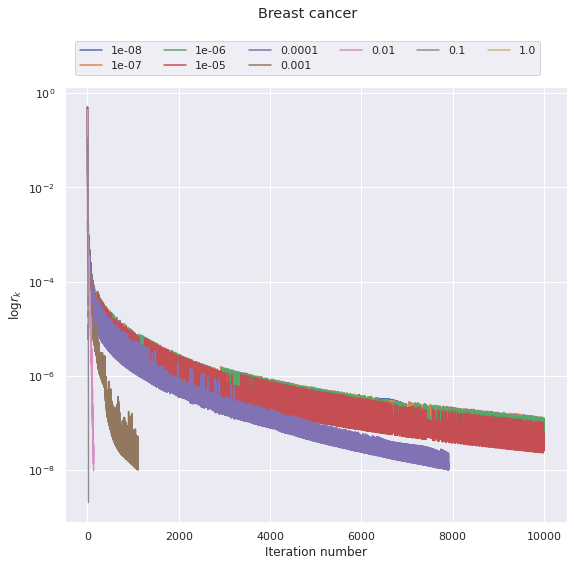

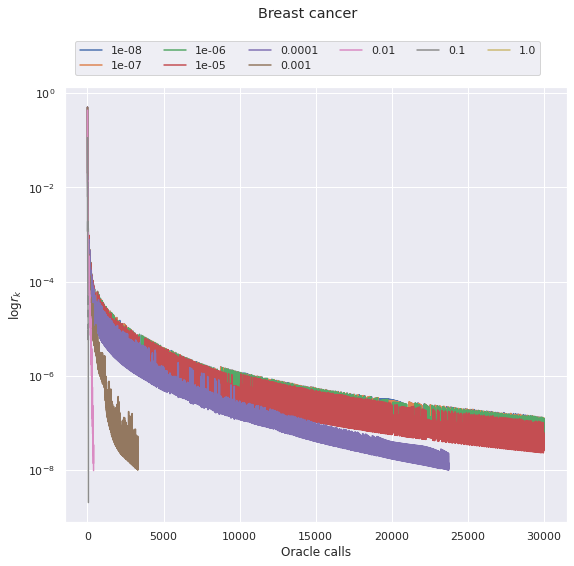

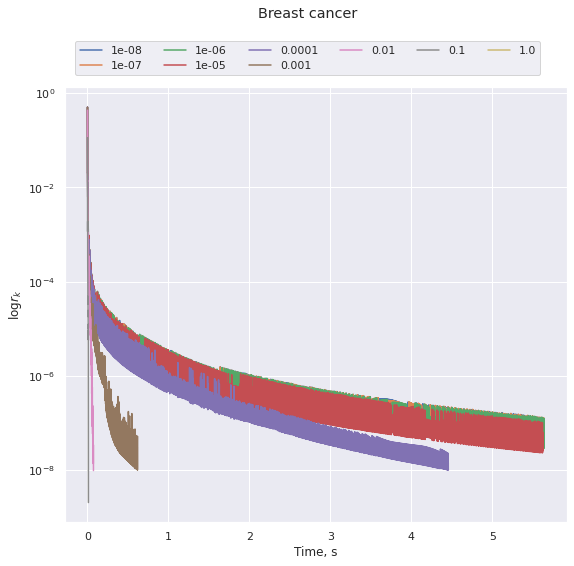

In [16]:
max_iter = 10000
oracle = make_oracle("a1a.libsvm")
w0 = np.ones((oracle.m, 1)) * 0

to_df = []
best_to_df = []

lambdas = np.logspace(-8, 0, 9)

for lambda_ in lambdas:
    w, log = optimize(w0, oracle, max_iter=max_iter, lambda_=lambda_)

    to_df.append(log.dataframe)
    best_to_df.append(log.best)

best_data = pd.concat(best_to_df, ignore_index=True)
data = pd.concat(to_df, ignore_index=True)

plot(data, lambdas, "num_iter", "Breast cancer")
plot(data, lambdas, "oracle_calls", "Breast cancer")
plot(data, lambdas, "time", "Breast cancer")

С ростом коэффициента регуляризации количество ненулевых весов уменьшается, скорость сходимости увеличивается, и, возможно, чувствуется сила земли (гора на раковом датасете).